In [ ]:
# get full dataset/arrange data

In [ ]:
553+959+158+7074+51735+4082+2056+5288+

In [14]:
import os
import re
import pandas as pd
# df_vi=pd.read_csv('visible.csv')
# df_invi=pd.read_csv('invisible.csv')
# df_m=pd.read_csv('annotations_double.csv')
# df_invi_base=pd.read_csv('base_invis.csv')
# df_invi_base = df_invi_base.rename(columns={'class': 'base_class'})
# df_invi=pd.merge(df_invi,df_invi_base[['file','framenumber','base_class']] , on=['file','framenumber'], how="inner")
# df_vi['case']='visible'
# df_vi=df_vi[['file','framenumber','base_ff','is_blurry','class','base_class','m2prop_class','case']]
# df_invi=df_invi[['file','framenumber','base_ff','is_blurry','class','m2prop_class','case','base_class']]
# dft=df_vi.append(df_invi, ignore_index=True)
# # file: video name
# # base_ff: face(1),no_face(0),abnormal_face(2);
# # class: class from manual annotation
# # base_class: class from baseline method
# # m2prop_class: class from l2cs model with improved mapping approach(max(propotion of gaze length in diagnal of bb))
# dft = dft.rename(columns={'file': 'video', 'framenumber': 'frame','class':'manual','base_ff':'face','m2prop_class':'l2cs','base_class':'baseline'})
# dft.to_csv('dataset.csv')

In [15]:
# input data

In [16]:
import os
import re
import pandas as pd
dft=pd.read_csv('dataset.csv')
dft=dft[(dft['face']==1)&(dft['manual']!=4)]


In [17]:
# #debug
# df=dft.copy()
# x=0
# for f in df[(df['case']=='visible')]['video'].unique(): 
# #     n_label=len(df[df['video']==f]['manual'].unique())
#     if 3 in df[df['video']==f]['manual'].unique():
#         x=x+1
    

In [18]:
x

42

In [19]:
#frame level to event level¶

In [20]:
import pandas as pd
from itertools import groupby
manual_event_group = []

for f in dft['video'].unique():
    list_manual = dft[dft['video'] == f]['manual'].tolist()
    count_dups = [sum(1 for _ in group) for _, group in groupby(list_manual)]
    count = 1
    for cd in count_dups:
        manual_event_group.extend([count] * cd)
        count += 1

print(len(manual_event_group))
dft['event_group'] = manual_event_group

226256


In [21]:
#find the value have the most frequency in every group
df=dft.copy()
most_frequent_values = df.groupby(['video','event_group'])[['l2cs','baseline']].apply(lambda x: x.mode().iloc[0])
# Merge the most frequent values back to the original DataFrame
df = df.merge(most_frequent_values, on=['video','event_group'], suffixes=('', '_most_frequent'))

In [22]:
0.0


0.0

In [23]:
# pretest: confusion matrix

553
1512
1512
1670
8744
60479
64561
66617
71905
84175
90895
99939
105623
116651
117423
121683


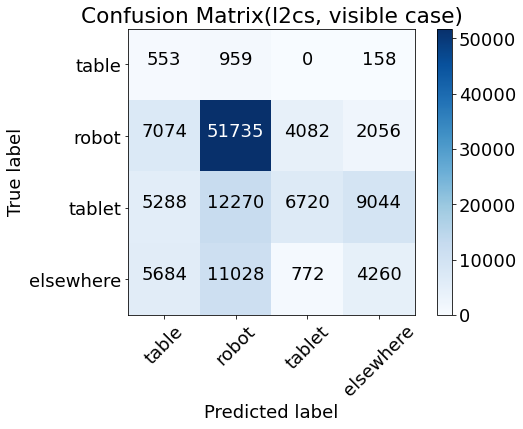

In [30]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['font.size'] = 18
# Assuming you have actual and predicted labels for your 4-class classification
actual_labels = df[df['case']=='visible']['manual']  # Replace with your actual labels
predicted_labels = df[df['case']=='visible']['l2cs_most_frequent']  # Replace with your predicted labels

# Compute confusion matrix
cm = confusion_matrix(actual_labels, predicted_labels)

# Create a figure and a matrix subplot
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix(l2cs, visible case)')
plt.colorbar()

# Creating labels for classes
classes = ['table', 'robot', 'tablet', 'elsewhere']
#table,robot,tablet,elsewhere
# Adding ticks and labels to the plot
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
s=0
# Adding the actual numbers inside the cells
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        s=s+cm[i,j]
        print(s)

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [31]:
# F1 score, precision and recall

In [7]:
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
# Assuming you have actual and predicted labels for your 4-class classification
actual_labels = df[df['case']=='visible']['manual']  # Replace with your actual labels
predicted_labels = df[df['case']=='visible']['l2cs_most_frequent']
# Calculate F1 score for each class and average
f1 = f1_score(actual_labels, predicted_labels, average='weighted')
report = classification_report(actual_labels, predicted_labels)
print(f"F1 Score: {f1:.4f}")
print(report)

actual_labels = df[df['case']=='visible']['manual']  # Replace with your actual labels
predicted_labels = df[df['case']=='visible']['baseline_most_frequent']
# Calculate F1 score for each class and average
f1 = f1_score(actual_labels, predicted_labels, average='weighted')
report = classification_report(actual_labels, predicted_labels)
print(f"F1 Score: {f1:.4f}")
print(report)

actual_labels = df[df['case']=='invisible']['manual']  # Replace with your actual labels
predicted_labels = df[df['case']=='invisible']['l2cs_most_frequent']
# Calculate F1 score for each class and average
f1 = f1_score(actual_labels, predicted_labels, average='weighted')
report = classification_report(actual_labels, predicted_labels)
print(f"F1 Score: {f1:.4f}")
print(report)

actual_labels = df[df['case']=='invisible']['manual']  # Replace with your actual labels
predicted_labels = df[df['case']=='invisible']['baseline_most_frequent']
# Calculate F1 score for each class and average
f1 = f1_score(actual_labels, predicted_labels, average='weighted')
report = classification_report(actual_labels, predicted_labels)
print(f"F1 Score: {f1:.4f}")
print(report)


F1 Score: 0.5154
              precision    recall  f1-score   support

           0       0.03      0.33      0.05      1670
           1       0.68      0.80      0.73     64947
           2       0.58      0.20      0.30     33322
           3       0.27      0.20      0.23     21744

    accuracy                           0.52    121683
   macro avg       0.39      0.38      0.33    121683
weighted avg       0.57      0.52      0.52    121683

F1 Score: 0.5346
              precision    recall  f1-score   support

           0       0.08      0.25      0.12      1670
           1       0.73      0.73      0.73     64947
           2       0.71      0.19      0.29     33322
           3       0.27      0.53      0.36     21744

    accuracy                           0.54    121683
   macro avg       0.45      0.42      0.37    121683
weighted avg       0.63      0.54      0.53    121683

F1 Score: 0.6374
              precision    recall  f1-score   support

           0       0.28 

In [8]:


from sklearn.metrics import f1_score

# Assuming you have actual and predicted labels for your 4-class classification
actual_labels = [0, 1, 2, 3, 1, 2, 0, 3, 3, 2]  # Replace with your actual labels
predicted_labels = [0, 1, 2, 3, 1, 3, 0, 2, 3, 2]  # Replace with your predicted labels

# Calculate F1 score for each class
f1_per_class = f1_score(actual_labels, predicted_labels, average=None)

print("F1 Score for each class:")
for i, f1 in enumerate(f1_per_class):
    print(f"Class {i}: {f1:.4f}")
f1_per_class[3] 

F1 Score for each class:
Class 0: 1.0000
Class 1: 1.0000
Class 2: 0.6667
Class 3: 0.6667


0.6666666666666666

In [76]:
# compare baseline and l2cs on visible data and invisible data

In [32]:
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
f1_vi=pd.DataFrame()
df_l2cs_vi = []
df_base_vi = []
for f in df[df['case']=='visible']['video'].unique():
    actual_labels = df[df['video']==f]['manual']  # Replace with your actual labels
 
    predicted_labels_baseline = df[df['video']==f]['baseline_most_frequent']
    predicted_labels_l2cs = df[df['video']==f]['l2cs_most_frequent']
    f1_l2cs=f1_score(actual_labels, predicted_labels_l2cs, average='weighted')
    f1_baseline=f1_score(actual_labels, predicted_labels_baseline, average='weighted')

    df_l2cs_vi.append(f1_l2cs)
    df_base_vi.append(f1_baseline)
f1_vi['l2cs']=df_l2cs_vi
f1_vi['baseline']=df_base_vi

f1_invi=pd.DataFrame()
df_l2cs_invi = []
df_base_invi = []
for f in df[df['case']=='invisible']['video'].unique():
    actual_labels = df[df['video']==f]['manual']  # Replace with your actual labels
 
    predicted_labels_baseline = df[df['video']==f]['baseline_most_frequent']
    predicted_labels_l2cs = df[df['video']==f]['l2cs_most_frequent']
    f1_l2cs=f1_score(actual_labels, predicted_labels_l2cs, average='weighted')
    f1_baseline=f1_score(actual_labels, predicted_labels_baseline, average='weighted')

    df_l2cs_invi.append(f1_l2cs)
    df_base_invi.append(f1_baseline)
f1_invi['l2cs']=df_l2cs_invi
f1_invi['baseline']=df_base_invi

l2cs=pd.DataFrame()
baseline=pd.DataFrame()
l2cs['vi']=f1_vi['l2cs']
l2cs['invi']=f1_invi['l2cs']
baseline['vi']=f1_vi['baseline']
baseline['invi']=f1_invi['baseline']

In [34]:
print(f1_vi.mean())
print(f1_invi.mean())

print(f1_vi.std())
print(f1_invi.std())

import scipy.stats as stats
t_statistic, p_value = stats.ttest_rel(f1_vi['l2cs'], f1_vi['baseline'])
print(t_statistic, p_value)
t_statistic, p_value = stats.ttest_rel(f1_invi['l2cs'], f1_invi['baseline'])
print(t_statistic, p_value)
t_statistic, p_value = stats.ttest_ind(f1_vi['l2cs'], f1_invi['l2cs'])
print(t_statistic, p_value)
t_statistic, p_value = stats.ttest_ind(f1_vi['baseline'], f1_invi['baseline'])
print(t_statistic, p_value)

l2cs        0.507057
baseline    0.510488
dtype: float64
l2cs        0.604617
baseline    0.540681
dtype: float64
l2cs        0.212052
baseline    0.244924
dtype: float64
l2cs        0.264022
baseline    0.221806
dtype: float64
-0.0819010909344269 0.9350968063647636
1.3663758106849528 0.17876361710019747
-1.93261681588026 0.05649963427233465
-0.6129513917202404 0.5414893853384335


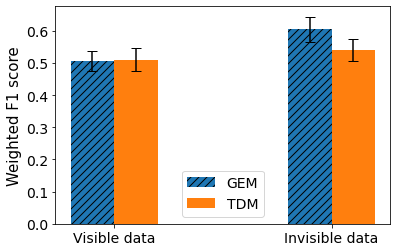

In [37]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['font.size'] = 14
# Data for the two vectors and their corresponding error bars
groups = ['Visible data',  'Invisible data']
values_vector1 = np.array(l2cs.mean())
values_vector2 = np.array(baseline.mean())
errors_vector1 = np.array(l2cs.sem())
errors_vector2 = np.array(baseline.sem())

# Create a bar plot with error bars
x = np.arange(len(groups))
width = 0.2

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, values_vector1, width, label='GEM', hatch='///',yerr=errors_vector1, capsize=5)
rects2 = ax.bar(x + width/2, values_vector2, width, label='TDM', yerr=errors_vector2, capsize=5)

ax.set_ylabel('Weighted F1 score',fontsize=15)
# ax.set_title('Bar Plot Comparison with Error Bars')

ax.set_xticks(x)
ax.set_xticklabels(groups)
ax.legend()

# fig.tight_layout()about

plt.show()



In [29]:
l2cs.mean()
baseline.mean()

vi      0.510488
invi    0.540681
dtype: float64

In [152]:

l2cs_vi=[0.05,0.73,0.40,0.23]
baseline_vi=[0.12,0.73,0.29,0.36]
l2cs_invi=[0.28,0.76,0.56,0.37]
baseline_invi=[0.74,0.74,0.40,0.26]

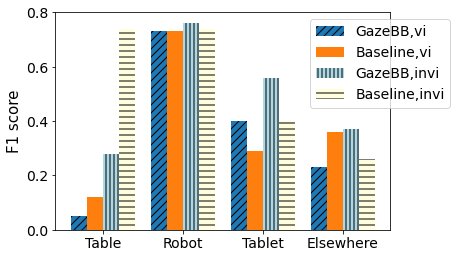

In [160]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['font.size'] = 14
l2cs_vi=[0.05,0.73,0.40,0.23]
baseline_vi=[0.12,0.73,0.29,0.36]
l2cs_invi=[0.28,0.76,0.56,0.37]
baseline_invi=[0.74,0.74,0.40,0.26]
# Data for the two vectors and their corresponding error bars
groups = ['Table','Robot',  'Tablet', 'Elsewhere']
values_vector1 = np.array(l2cs_vi)
values_vector2 = np.array(baseline_vi)
values_vector3 = np.array(l2cs_invi)
values_vector4 = np.array(baseline_invi)

# Create a bar plot with error bars
x = np.arange(len(groups))
width = 0.2

fig, ax = plt.subplots()
rects1 = ax.bar(x - width*1.5, values_vector1, width, label='GazeBB,vi', hatch='///')
rects2 = ax.bar(x - width*0.5, values_vector2, width, label='Baseline,vi')
rects3 = ax.bar(x + width*0.5, values_vector3, width, label='GazeBB,invi', hatch='|||',color='lightblue')
rects4 = ax.bar(x + width*1.5, values_vector4, width, label='Baseline,invi',hatch='--',color='lightyellow')

#ax.set_xlabel('Lables(the percentage of its bounding box area in the image)',fontsize=15)
ax.set_ylabel('F1 score',fontsize=15)
# ax.set_title('Bar Plot Comparison with Error Bars')

ax.set_xticks(x)
ax.set_xticklabels(groups)
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
# ax.legend()
plt.ylim((0, 0.8))
# fig.tight_layout()about

plt.show()


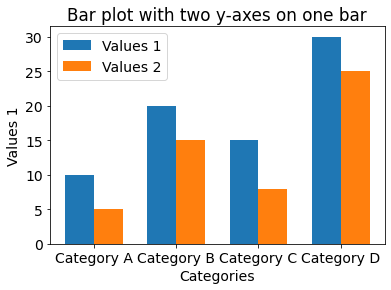

In [132]:
import matplotlib.pyplot as plt
import numpy as np

# Data
categories = ['Category A', 'Category B', 'Category C', 'Category D']
values1 = [10, 20, 15, 30]  # Values for the first y-axis
values2 = [5, 15, 8, 25]  # Values for the second y-axis

bar_width = 0.35  # Width of each bar
index = np.arange(len(categories))  # Index for the x-axis positions

fig, ax = plt.subplots()

# Plotting bars for the first y-axis
ax.bar(index, values1, bar_width, label='Values 1')

# Plotting bars for the second y-axis
ax.bar(index + bar_width, values2, bar_width, label='Values 2')

# Adding labels, title, and legend
ax.set_xlabel('Categories')
ax.set_ylabel('Values 1')
ax.set_title('Bar plot with two y-axes on one bar')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(categories)
ax.legend()

plt.show()


In [23]:
l2cs0,l2cs1,l2cs2,l2cs3=[],[],[],[]
base0,base1,base2,base3=[],[],[],[]
l2cs_label_vi=pd.DataFrame()
base_label_vi=pd.DataFrame()
l2cs_label_invi=pd.DataFrame()
base_label_invi=pd.DataFrame()
lvi=0
for f in df[(df['case']=='visible')]['video'].unique(): 
    n_label=len(df[df['video']==f]['manual'].unique())
    if n_label==4:
        lvi=lvi+1
        #print(df[df['video']==f]['manual'].unique())
        actual_labels = df[df['video']==f]['manual']  # Replace with your actual labels
        predicted_labels_baseline = df[df['video']==f]['baseline_most_frequent']
        predicted_labels_l2cs = df[df['video']==f]['l2cs_most_frequent']
        f1_l2cs = f1_score(actual_labels, predicted_labels_l2cs, average=None)
        f1_base = f1_score(actual_labels, predicted_labels_baseline, average=None)
        l2cs0.append(f1_l2cs[0])
        l2cs1.append(f1_l2cs[1])
        l2cs2.append(f1_l2cs[2])
        l2cs3.append(f1_l2cs[3])
        base0.append(f1_base[0])
        base1.append(f1_base[1])
        base2.append(f1_base[2])
        base3.append(f1_base[3])
l2cs_label_vi[0]=l2cs0
l2cs_label_vi[1]=l2cs1
l2cs_label_vi[2]=l2cs2
l2cs_label_vi[3]=l2cs3
base_label_vi[0]=base0
base_label_vi[1]=base1
base_label_vi[2]=base2
base_label_vi[3]=base3

lnivi=0
for f in df[(df['case']=='invisible')]['video'].unique(): 
    n_label=len(df[df['video']==f]['manual'].unique())
    if n_label==4:
        lnivi=lnivi+1
        #print(df[df['video']==f]['manual'].unique())
        actual_labels = df[df['video']==f]['manual']  # Replace with your actual labels
        predicted_labels_baseline = df[df['video']==f]['baseline_most_frequent']
        predicted_labels_l2cs = df[df['video']==f]['l2cs_most_frequent']
        f1_l2cs = f1_score(actual_labels, predicted_labels_l2cs, average=None)
        f1_base = f1_score(actual_labels, predicted_labels_baseline, average=None)
        l2cs0.append(f1_l2cs[0])
        l2cs1.append(f1_l2cs[1])
        l2cs2.append(f1_l2cs[2])
        l2cs3.append(f1_l2cs[3])
        base0.append(f1_base[0])
        base1.append(f1_base[1])
        base2.append(f1_base[2])
        base3.append(f1_base[3])
l2cs_label_invi[0]=l2cs0
l2cs_label_invi[1]=l2cs1
l2cs_label_invi[2]=l2cs2
l2cs_label_invi[3]=l2cs3
base_label_invi[0]=base0
base_label_invi[1]=base1
base_label_invi[2]=base2
base_label_invi[3]=base3

In [21]:
import scipy.stats as stats
import numpy as np

# Perform one-way ANOVA
# f_statistic, p_value = stats.f_oneway(l2cs_label_vi[0], l2cs_label_vi[1], l2cs_label_vi[2],l2cs_label_vi[3])
# print(f_statistic, p_value)
# f_statistic, p_value = stats.f_oneway(l2cs_label_invi[0], l2cs_label_invi[1], l2cs_label_invi[2],l2cs_label_invi[3])
# print(f_statistic, p_value)
# f_statistic, p_value = stats.f_oneway(base_label_vi[0], base_label_vi[1], base_label_vi[2],base_label_vi[3])
# print(f_statistic, p_value)
# f_statistic, p_value = stats.f_oneway(base_label_invi[0], base_label_invi[1], base_label_invi[2],base_label_invi[3])
# print(f_statistic, p_value)

t_statistic, p_value = stats.ttest_rel(l2cs_label_vi[0], base_label_vi[0])
print(t_statistic, p_value)
t_statistic, p_value = stats.ttest_rel(l2cs_label_vi[1], base_label_vi[1])
print(t_statistic, p_value)
t_statistic, p_value = stats.ttest_rel(l2cs_label_vi[2], base_label_vi[2])
print(t_statistic, p_value)
t_statistic, p_value = stats.ttest_rel(l2cs_label_vi[3], base_label_vi[3])
print(t_statistic, p_value)

t_statistic, p_value = stats.ttest_rel(l2cs_label_invi[0], base_label_invi[0])
print(t_statistic, p_value)
t_statistic, p_value = stats.ttest_rel(l2cs_label_invi[1], base_label_invi[1])
print(t_statistic, p_value)
t_statistic, p_value = stats.ttest_rel(l2cs_label_invi[2], base_label_invi[2])
print(t_statistic, p_value)
t_statistic, p_value = stats.ttest_rel(l2cs_label_invi[3], base_label_invi[3])
print(t_statistic, p_value)



-0.08766245534706968 0.9314809290688741
-0.1871411179503815 0.8544391015870628
1.3202437555605637 0.2095277962646998
-1.8758393576720773 0.08330978167957138
-1.1973595162367086 0.23996114772535757
-0.1462020505995333 0.8846790300546904
2.109602598155037 0.04280559697848079
0.40271427600001614 0.6898362646639622


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['font.size'] = 16
# Data for the two vectors and their corresponding error bars
groups = ['Table',  'Robot','Tablet','Elsewhere']
values_vector1 = np.array(l2cs_label_vi.mean())
values_vector2 = np.array(base_label_vi.mean())
errors_vector1 = np.array(l2cs_label_vi.sem())
errors_vector2 = np.array(base_label_vi.sem())



# Create a bar plot with error bars
x = np.arange(len(groups))
width = 0.4

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, values_vector1, width, label='GazeBB', hatch='///',yerr=errors_vector1, capsize=5)
rects2 = ax.bar(x + width/2, values_vector2, width, label='Baseline', yerr=errors_vector2, capsize=5)

ax.set_ylabel('F1 score',fontsize=15)
# ax.set_title('Bar Plot Comparison with Error Bars')

ax.set_xticks(x)
ax.set_xticklabels(groups)
ax.legend()

# fig.tight_layout()about
plt.ylim((0, 0.8))
plt.show()


[0 1 2 3]


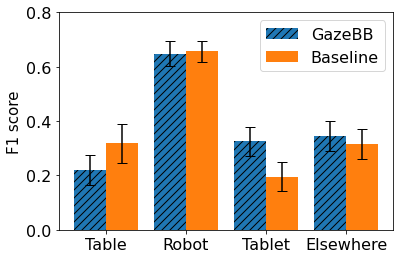

0    0.170032
1    0.615538
2    0.201222
3    0.207557
dtype: float64
0    0.180712
1    0.629194
2    0.096206
3    0.351559
dtype: float64
0    0.219743
1    0.648568
2    0.325573
3    0.344526
dtype: float64
0    0.317556
1    0.656079
2    0.195253
3    0.316557
dtype: float64


In [20]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['font.size'] = 16
# Data for the two vectors and their corresponding error bars
groups = ['Table',  'Robot','Tablet','Elsewhere']
values_vector1 = np.array(l2cs_label_invi.mean())
values_vector2 = np.array(base_label_invi.mean())
errors_vector1 = np.array(l2cs_label_invi.sem())
errors_vector2 = np.array(base_label_invi.sem())



# Create a bar plot with error bars
x = np.arange(len(groups))
width = 0.4
print(x)
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, values_vector1, width, label='GazeBB', hatch='///',yerr=errors_vector1, capsize=5)
rects2 = ax.bar(x + width/2, values_vector2, width, label='Baseline', yerr=errors_vector2, capsize=5)

ax.set_ylabel('F1 score',fontsize=15)
# ax.set_title('Bar Plot Comparison with Error Bars')

ax.set_xticks(x)
ax.set_xticklabels(groups)
ax.legend()
plt.ylim((0, 0.8))
# fig.tight_layout()about

plt.show()
print(l2cs_label_vi.mean())
print(base_label_vi.mean())
print(l2cs_label_invi.mean())
print(base_label_invi.mean())


In [ ]:
# explore why GazeBB perform better on label'tablet'

In [24]:
#df[(df['manual']==0)&(df['case']=='invisible')][['video','frame']]
#df[(df['manual']==2)&(df['case']=='invisible')&(df['baseline_most_frequent']!=2)&(df['l2cs_most_frequent']==2)][['video','frame']]

In [25]:
#df[(df['video']=='33011_sessie2_taskrobotEngagement')&(df['frame'].isin(range(1914,1917)))]

In [26]:
#df[(df['video']=='33011_sessie2_taskrobotEngagement')&(df['event_group']==24)].head(60)